# AY23-24 T1 ACCT649 Lab Test 2


In [ ]:
### Author: Jason Chan

### Instructions
 - Only perform the steps mentioned in the instructions. Do not perform additional data preparation
 - Use this notebook for coding, then submit this file.
 - You may add additional cells in this notebook as required
 - If a question asks you to write code, you will only score marks if your code produces output from which you can determine the correct answer
 - If a question asks you to type an answer that is not code, you will only score marks if you type the correct answer




### Data description

This dataset represents data collected from police in a country.

Each row in the dataset represents a local area, which is a small rectangular area on a map.

The attributes (columns) of the dataset and their meanings are:

- region - In which larger region the local area is in
- x - The x-coordinate of the center of the local area
- y - The y-coordinate of the center of the local area
- x_range - Half of the width of the local area
- y_range - Half of the length of the local area
- local_area_size - A categorical value based on the size of the local area
- incidents - How many incidents have occurred in the local area
- arrests - How many arrests have occurred in the local area
- patrols - How many patrols on average occur in the local area per unit of time

### Important!
 - Each question is worth 3 marks
 - For most questions, full marks are scored ONLY if your code prints the correct answer, and nothing else
 - Part marks may be scored if your code still produces output from which you can determine the correct answer
 - See the examples below

## 0. (Example question and sample answers) Create a 2-D array with the values 1 and 2 in the first row, and 3 and 4 in the second row. What is the sum of integers in the second column?
[0 marks]

In [1]:
# This sample solution would only score 2 marks,
# because it does NOT only show sum of integers of second column
# (it also shows the sum of integers on the first row)
import pandas as pd
dictionary = {'first_column':[1,3], 'second_column':[2,4]}
dataframe = pd.DataFrame(dictionary)
dataframe.sum()

first_column     4
second_column    6
dtype: int64

In [2]:
# This sample solution would score 3 marks (full marks)
dictionary = {'first_column':[1,3], 'second_column':[2,4]}
dataframe = pd.DataFrame(dictionary)
dataframe['second_column'].sum()

6

## Make sure to run this cell first:

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Read the dataset from CSV file and save into a variable called 'df'. Then show the first 5 rows of the dataframe.
[3 marks]

In [4]:
# Read dataset from CSV file
df = pd.read_csv('police.csv')

# Show first 5 rows of dataset
df.head()

,region,x,y,x_range,y_range,local_area_size,incidents,arrests,patrols
0,SW,1149842.696,1877758.827,1938.351906,5720.275370,small,13971,2689,854.039725
1,SW,1150150.279,1875969.757,737.137748,13754.796780,big,40533,9656,905.711272
2,SW,1150381.846,1883146.164,6457.156173,4553.813230,big,68759,19246,1020.126209
3,SW,1150397.503,1876165.074,1624.312523,2422.325833,small,4068,790,817.587021
4,SW,1150603.439,1875453.049,3353.859873,2056.304264,small,6870,1133,818.067249


## 2. How many rows and how many columns are in the dataset?
[3 marks]

In [5]:
# Show dimensions (number of rows and columns) of dataset
print(df.shape)

### (200000, 9)

(200000, 9)


## 3. How many missing values are there for the variable 'patrols'?
[3 marks]

In [6]:
# First, get only 'patrols' column.
# Then, check each value if it is null.
# Then, add up all 'True' values as 1, and 'False' values as 0
df['patrols'].isnull().sum()

### 157

157

## 4. What is the range (difference between maximum and minimum) of values in the 'incidents' variable?
[3 marks]

In [7]:
# Get range of values in attribute 'incidents'
df['incidents'].max() - df['incidents'].min()

### 985284

985284

## 5. What is the standard deviation of number of patrols in the NE region? (round to 2 decimal places)
[3 marks]

In [8]:
# First, group by region,
# then, use only the 'patrols' column,
# then get standard deviation,
# then get only the 'NE' column,
# rounded to 2 decimal places
round(df.groupby('region')['patrols'].std()['NE'], 2)

### 268

268.0

In [27]:
df.groupby('region')['patrols'].std()['NE']

268.00422858952146

## 4. How many local areas (rows in dataset) had more than 10,000 arrests?
[3 marks] 

In [9]:
# First, get rows with more than 10,000 arrests.
# Then, get dimensions (number of rows and columns) of result.
# Then, show only number of rows.
df[df['arrests'] > 10000].shape[0]

### 152825

152825

In [29]:
df[df['arrests'] > 10000].shape

(152825, 10)

## 5. How many local areas (rows in dataset) had between 900 and 1,000 patrols, inclusive (including 900 and 1000)?
[3 marks]

In [10]:
# First, get rows with more than 900 patrols and less than 1,000 patrols.
# Then, get dimensions (number of rows and columns) of result.
# Then, show only number of rows
df[(df['patrols'] >= 900) & (df['patrols'] <= 1000)].shape[0]

### 51193

51193

## 6. What is the total number of incidents in the SW region?
[3 marks] 

In [11]:
# First, group by region,
# then get only the incidents column,
# then get total,
# then get only 'SW' column
df.groupby('region')['incidents'].sum()['SW']

### 9431762107

9431762107

In [31]:
df.groupby('region')['incidents'].sum()

region
NE       12637562
NW    16412669284
SE     6053507176
SW     9431762107
Name: incidents, dtype: int64

## 7. What is the highest median of patrols, when grouping by region and local_area_size?
[3 marks] 

In [12]:
# First, group by 'region', then group by 'local_area_size'
# then show median of 'patrols',
# then show maximum value
df.groupby(['region', 'local_area_size'])['patrols'].median().max()

### 1295.3220625

1295.3220625

In [32]:
df.groupby(['region', 'local_area_size'])['patrols'].median()

region  local_area_size
NE      big                 482.071575
        small               257.823043
NW      big                1288.742053
        small              1295.322062
SE      big                 689.306220
        small               808.332529
SW      big                 912.937380
        small               913.928945
Name: patrols, dtype: float64

## 8. What is the value of the variable 'x' of the local area (row in dataset) in the NW region that had the highest number of incidents?
[3 marks]

In [13]:
# First, get only the local areas in the NW region
df_NW = df[df['region'] == 'NW']

# Then, get only the local area from these local areas in the SW region
# that had the minimum number of incidents,
# then get only column 'x'
print(df_NW[df_NW['incidents'] == df_NW['incidents'].max()]['x'])

### 1154329.133

4748    1154329.133
Name: x, dtype: float64


In [37]:
region = df.groupby("region").max()
region_x = region["x"]
 
print(region_x)

region
NE    1182336.635
NW    1167059.485
SE    1185386.150
SW    1166985.321
Name: x, dtype: float64


In [36]:
df_NW[df_NW['incidents'] == df_NW['incidents'].max()]

,region,x,y,x_range,y_range,local_area_size,incidents,arrests,patrols
4748,NW,1154329.133,1901557.542,7921.394402,15314.93095,big,985284,347441,1305.927679


## 9. Divide up the local areas (rows in dataset) into 3 categories based on the value of the variable 'incidents':

- low incident rate, with incidents values less than or equal to 330,000 incidents
- high incident rate, with incidents values greater than 660,000 incidents
- medium incident rate, with incidents values in between the above two categories

## These categories should be the values of a new variable called 'incidents_group'

## What is the lowest standard deviation of the number of patrols among these three categories?
[3 marks]

In [14]:
# Create a new variable 'incidents_bins' which will be categorical.
# We use the 'crimes' variable to create bins with the given bin boundaries, and label each bin
df['incidents_group'] = pd.cut(df['incidents'], bins = [-1,330000,660000,990000], labels = ['low','medium','high'])

# Show minimum 'patrol' values for each category in 'incidents_bins' variable
df.groupby('incidents_group')['patrols'].std().min()

### 96.88444314947127

96.88444314947127

## 10. Create a pivot table that shows average values of arrests, with variable 'local_area_size' shown as rows and 'region' as columns. Include margin data.
[3 marks]

In [15]:
# Create pivot table, showing average number of arrests,
# with 'local_area_size' as rows and 'region' as coluns,
# with margin data
df.pivot_table('arrests', index = 'local_area_size', columns = 'region', margins=all)

region,NE,NW,SE,SW,All
local_area_size,,,,,
big,65893.571429,85157.020486,64596.219746,45296.096217,64860.416852
small,20406.272727,22455.551211,21216.194362,9826.515778,17091.019781
All,51798.915493,62905.955084,49237.489234,32736.659920,47932.136765


## 11. Create a pivot table that shows average number of arrests, for a small local area size, the NW region, and low incident rate. 

## Then write down this value as a comment after your code.

## Your code does NOT need to only show the above value (it's OK if your pivot shows other data as well).
[3 marks]

In [16]:
# Create pivot table, showing average number of arrests,
# with 'local_area_size' as rows and 'region' as coluns,
# with margin data
df.pivot_table('arrests', index = ['local_area_size', 'incidents_group'], columns = 'region', margins=all)

### 22390.901346

region                                      NE             NW             SE  \
local_area_size incidents_group                                                
big             low               41531.323529   48383.206688   52057.418750   
                medium           121114.666667  139501.373706  125021.459879   
                high                       NaN  233911.648729            NaN   
small           low               20406.272727   22390.901346   21216.194362   
                medium                     NaN  128694.294118            NaN   
All                               51798.915493   62905.955084   49237.489234   

region                                      SW            All  
local_area_size incidents_group                                
big             low               36291.483588   43548.552980  
                medium           119473.917020  132792.053484  
                high             253924.000000  233931.571429  
small           low                9826.515778   17064.244320  
                medium                     NaN  128694.294118  
All                               32736.659920   47932.136765

In [38]:
# Write your code here:
df.pivot_table('arrests', index = ['local_area_size', 'region'], columns = 'incidents_group')
##the value should be 24418.989284

incidents_group                  low         medium           high
local_area_size region                                            
big             NE      41531.323529  121114.666667            NaN
                NW      48383.206688  139501.373706  233911.648729
                SE      52057.418750  125021.459879            NaN
                SW      36291.483588  119473.917020  253924.000000
small           NE      20406.272727            NaN            NaN
                NW      22390.901346  128694.294118            NaN
                SE      21216.194362            NaN            NaN
                SW       9826.515778            NaN            NaN

## 12. Write code to show all possible combinations of only the categorical values that exist in df (you can print a dataframe, where each row is a combination).

## Each combination should only be shown once.

## Your code should NOT show any combinations of these categorical values that do not exist.

## e.g. In df, if there is no row that contains the values ['SW', 'small', 'high'] for variables ['region', 'local_area_size', 'incidents_group'], then you should not print that row.

## df should remain unchanged.
[3 marks]

In [17]:
# Keep only some variables in the dataset
df_categorical = df[['region', 'local_area_size', 'incidents_group']]

# Remove any duplicates, to show each possible combination only once
df_categorical.drop_duplicates()

,region,local_area_size,incidents_group
0,SW,small,low
1,SW,big,low
13,NW,big,low
29,NW,small,low
34,SW,big,medium
117,NW,big,medium
229,NW,big,high
1570,NW,small,medium
36934,SW,big,high
159850,SE,small,low


## 13. Write code that creates a new CSV file called 'output.csv' in the same folder where this .ipynb file is saved.

## This new CSV file should only contain rows 10,000 to 20,000 inclusive (where row 0 is the first row), and only variables 'incidents' and 'arrests' (and no other columns, including indexes).

## df should remain unchanged.
[3 marks]

In [18]:
# Get only rows 10000 to 20000 inclusive
df_cut1 = df.iloc[10000:20001]

# Get only columns ['incidents', 'arrests']
df_cut2 = df_cut1[['incidents', 'arrests']]

# Write a DataFrame to CSV, not including the indices
df_cut2.to_csv('output.csv', index = False)

In [ ]:
# Get only rows 10000 to 20000 inclusive
df_cut1 = df.iloc[10000:20001]

# Get only columns ['incidents', 'arrests']
df_cut2 = df_cut1.iloc[6:8]

# Write a DataFrame to CSV, not including the indices
df_cut2.to_csv('output.csv', index = False)

## 14. Show a diagram that displays the distribution of values of the variable 'patrols'.
[3 marks] 

<AxesSubplot:xlabel='patrols', ylabel='Count'>

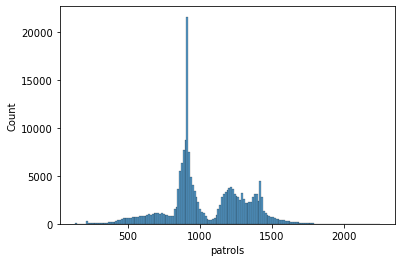

In [19]:
# Show histogram of 'patrols' variable
sns.histplot(df['patrols'])

## 15. Show the distribution of the variable 'y'. There should be 3 clear peaks in the distribution.

## After showing the diagram, use the diagram (without writing any more code) to determine what is the value of 'y' where the middle of the three peaks occurs at?

## In a comment, write your answer as an integer, rounded to the nearest 10,000. 
[3 marks] 

<AxesSubplot:xlabel='y', ylabel='Count'>

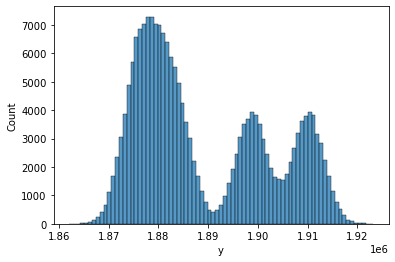

In [20]:
# Show histogram of 'y' variable
sns.histplot(df['y'])

### 1900000

## <font color="red">IMPORTANT:</font> All questions above this point involved dataframe 'df'. The questions below may ask you to use other dataframes.

## 16. Remove rows with missing values, and save the result in a new dataframe called 'df2'. 

## Then write code to make sure that this dataset should now contain 199893 rows but still have 10 columns.

## Also write code to make sure that the number of rows and columns in the original dataframe 'df' is unchanged.
[3 marks] 

In [21]:
# Remove rows with any missing values, and save into a new dataframe df2
df2 = df.dropna()

# Print dimensions (number of rows and columns) of resulting DataFrame
print(df2.shape)

# Print dimensions (number of rows and columns) of original DataFrame
print(df.shape)

(199843, 10)
(200000, 10)


## 17. Using df2, write code to show the correlation between all numeric variables using a heatmap.
[3 marks]

<AxesSubplot:>

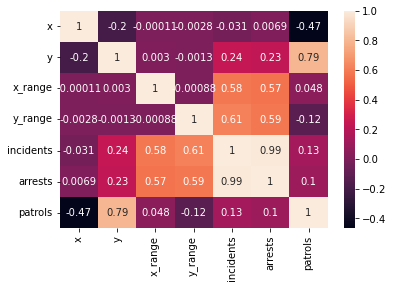

In [22]:
# Show correlation between variables as a heatmap instead
# (light colors means higher correlation,
# dark colors means lower correlation)
sns.heatmap(df2.corr(), annot=True)

## 18. Using only the output of the heatmap (and no other code, nor any other information), what are the different variables that are the most correleted? Write your answer as a comment.
[3 marks]

In [23]:
### 'incidents' and 'arrests'

## 19. From df (not df2), write code to create another dataframe df3, which contains only the variables ['x', 'y', 'x_range', 'y_range', 'incidents', 'arrests', 'patrols'].

## Show the number of rows and columns in df3.
[3 marks]

In [24]:
# Keep only some variables in the dataset
df3 = df[['x', 'y', 'x_range', 'y_range', 'incidents', 'arrests', 'patrols']]

# Determine dimensions (number of rows and columns) of dataset
df3.shape

(200000, 7)

## 20. Using df3, replace all missing values in the variable 'patrols' with 1000. Store the resultant dataset in a new dataframe df4.

## df3 should remain unchanged.

## Show the average value of variable patrols for both df3 and df4.
[3 marks]

In [25]:
# Replace missing values with 1000,
# and put into new dataframe df4
df4 = df3.fillna(value = 1000)

# Show average value of patrols, before replacement
df3_avg_patrol = df3['patrols'].mean()
print(df3_avg_patrol)

# Show new average value of patrols, after replacement
df4_avg_patrol = df4['patrols'].mean()
print(df4_avg_patrol)

1042.6866300477038
1042.6531210431158
